# Import Data Set

In [2]:
import pandas as pd
data = pd.read_csv('/Users/halders/Documents/Excelr/dataset/Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# Correlation

In [4]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


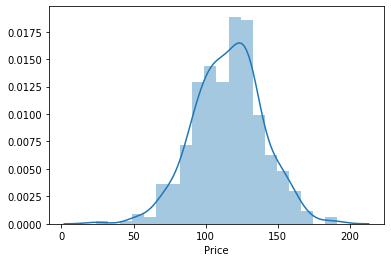

In [25]:
import seaborn as sns
sns.distplot(data['Price'])

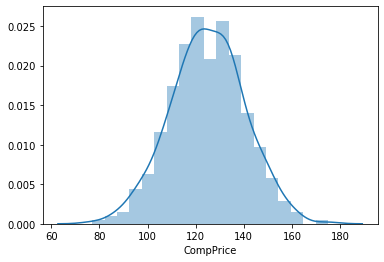

In [28]:
import seaborn as sns
sns.distplot(data['CompPrice'])

Fitting a Linear Regression Model

In [70]:
import statsmodels.formula.api as smf
model = smf.ols("Price~CompPrice",data = data).fit()

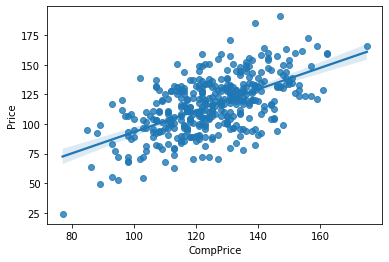

In [71]:
sns.regplot(x="CompPrice", y="Price", data=data);

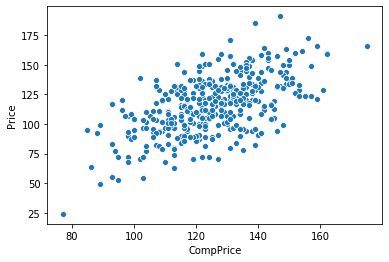

In [60]:
sns.scatterplot(x="CompPrice", y="Price", data=data);

In [72]:
#Coefficients
model.params

Intercept    2.941105
CompPrice    0.903012
dtype: float64

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     206.9
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           4.50e-38
Time:                        17:42:53   Log-Likelihood:                -1749.1
No. Observations:                 400   AIC:                             3502.
Df Residuals:                     398   BIC:                             3510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9411      7.904      0.372      0.710     -12.598      18.481
CompPrice      0.9030      0.063     14.384      0.000       0.780       1.026
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.115
Skew:                          -0.021   Prob(JB):                        0.944
Kurtosis:                       2.929   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    26.063134
Price        14.384240
dtype: float64 
 Intercept    4.405676e-88
Price        4.502047e-38
dtype: float64


In [34]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.34204691026776435, 0.3403937618011005)

# Predict for new data point

In [74]:
ypred = model.predict(data.CompPrice)

In [75]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(ypred,data.Price, squared=False)

In [77]:
import numpy as np
rmse = np.sqrt(rms)

In [78]:
rmse

4.379627940524872